In [2]:
import torch
import numpy as np

def subsequent_mask(size):
    "Mask out subsequent positions." # only the past should influence attention
    attn_shape = (1, size, size)
    subsequent_mask = np.triu(np.ones(attn_shape), k=1).astype('uint8') # np.triu(m, k=0): matrix m, k: diagonal above which to 0: 1=above diagonal
    return torch.from_numpy(subsequent_mask) == 0

if __name__=='__main__':
    print(subsequent_mask(10)[0])

tensor([[ True, False, False, False, False, False, False, False, False, False],
        [ True,  True, False, False, False, False, False, False, False, False],
        [ True,  True,  True, False, False, False, False, False, False, False],
        [ True,  True,  True,  True, False, False, False, False, False, False],
        [ True,  True,  True,  True,  True, False, False, False, False, False],
        [ True,  True,  True,  True,  True,  True, False, False, False, False],
        [ True,  True,  True,  True,  True,  True,  True, False, False, False],
        [ True,  True,  True,  True,  True,  True,  True,  True, False, False],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True, False],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,  True]])


In [4]:
# fluent py: sentence
import re
import reprlib

RE_WORD = re.compile('\w+')

class Sentence:
    
    def __init__(self, text): # iter - why sequences are iterable
        self.text = text
        self.words = RE_WORD.findall(text) # findall returns a list of non-overlapping matches of the regex
        
    def __getitem__(self, index):
        return self.words[index] # holds the result of findall
    
    def __len__(self): # needed for the sequence protocol
        return len(self.words)
    
    def __repr__(self):
        return 'Sentence(%s)' % reprlib.repr(self.text) # reprlib: utility to generate abbreviated string representations
    
if __name__=='__main__':
    s = Sentence('"The time has come," the Walrus said,')
    print(s)
    for word in s:
        print(word)

Sentence('"The time ha... Walrus said,')
The
time
has
come
the
Walrus
said


In [17]:
# polynomials and RSA
import itertools

class Polynomial:
    
    def __init__(self, coeffs):
        '''init polynomial with a list of coefficients, starting with the lowest power'''
        self.coeffs = list(coeffs)
        
    def __len__(self):
        '''return the degree of the polynomial'''
        return len(self.coeffs)
    
    def __getitem__(self, index):
        '''return the coefficient for the index given'''
        return self.coeffs[index]
        
    def __add__(self, other):
        '''add two polynomials'''
        try:
            pairs = itertools.zip_longest(self, other, fillvalue=0.0)
            return Polynomial(a + b for a, b in pairs)
        except TypeError:
            return NotImplemented
        
    def __radd__(self, other):
        return self + other # delegates to __add__
        
    def val(self, x):
        '''evaluate polynomial at x'''
        res = 0
        cx = 1
        for i in range(len(self)):
            res += self[i] * cx
            cx *= x
        return res
    
    def __str__(self):
        return str(tuple(self))  # build tuple from iterable

if __name__=='__main__':
    p0 = Polynomial([1., 2., 3.])
    print(p0.val(2.))
    p1 = Polynomial([1., 2., 3., 4.])
    p0 += p1
    print(p0.val(2.))
    print(p1.val(2.))
    print(p0)

17.0
66.0
49.0
(2.0, 4.0, 6.0, 4.0)


In [1]:
# fishs in the pond
import random

def fishtag(N, s0, s1, t1):
    tg0 = random.sample(range(N), s0)
    i = 0
    notg = []
    while len(notg) < (s1 - t1):
        ridx = random.randint(0, N)
        i += 1
        if not ridx in tg0:
            notg.append(ridx)
    return i

if __name__=='__main__':
    tst = 0
    for i in range(100):
        tst += fishtag(500, 100, 100, 20)
    print(tst/100) # should be 100

100.25


In [3]:
# sentence iterator
import re
import reprlib

RE_WORD = re.compile(r'\w+')

class Sentence:

    def __init__(self, text):
        self.text = text
        self.words = RE_WORD.findall(text)

    def __repr__(self):
        return 'Sentence(%s)' % reprlib.repr(self.text)

    def __iter__(self):  # <1> no getitem: makes it an iterable
        return SentenceIterator(self.words)  # <2> protocol fulfilled: instantiates and returns iterator


class SentenceIterator:

    def __init__(self, words):
        self.words = words  # <3>
        self.index = 0  # <4>

    def __next__(self):
        try:
            word = self.words[self.index]  # <5>
        except IndexError:
            raise StopIteration()  # <6>
        self.index += 1  # <7>
        return word  # <8>

    def __iter__(self):  # <9>
        return self

def main():
    s = Sentence('"The time has come," the Walrus said,')
    print(s)
    for word in s:
        print(word)
    '''import sys
    import warnings
    try:
        filename = sys.argv[1]
        word_number = int(sys.argv[2])
    except (IndexError, ValueError):
        print('Usage: %s <file-name> <word-number>' % sys.argv[0])
        #sys.exit(1)
    with open(filename, 'rt', encoding='utf-8') as text_file:
        s = Sentence(text_file.read())
    for n, word in enumerate(s, 1):
        if n == word_number:
            print(word)
            break
    else:
        warnings.warn('last word is #%d, "%s"' % (n, word))'''

if __name__ == '__main__':
    main()

Sentence('"The time ha... Walrus said,')
The
time
has
come
the
Walrus
said


In [34]:
"""
Sentence: iterate over words using a generator function
"""

import re
import reprlib

RE_WORD = re.compile(r'\w+')

class Sentence:

    def __init__(self, text):
        self.text = text
        self.words = RE_WORD.findall(text)

    def __repr__(self):
        return 'Sentence(%s)' % reprlib.repr(self.text)

    def __iter__(self):
        for word in self.words:  # <1> iterate over words
            yield word  # <2> yield the current word - turns function into a generator
        return  # <3> not needed - function can just fall through
    
def main():
    s = Sentence('"The time has come," the Walrus said,')
    print(s)
    for word in s:
        print(word)

if __name__ == '__main__':
    main()

Sentence('"The time ha... Walrus said,')
The
time
has
come
the
Walrus
said


In [3]:
def gen_123():
    yield 1
    yield 2
    yield 3
    
print(gen_123) # a function object
print(gen_123()) # invoked gen_123() returns a generator object
for i in gen_123(): # generators are iterators that produce the values of the expressions passed to yield
    print(i)
g = gen_123()
print(next(g)) # each next advances to the next yield
print(next(g))
print(next(g))
print(next(g)) # function body complete: StopIteration

<function gen_123 at 0x000002B39DB27A60>
<generator object gen_123 at 0x000002B39DB21468>
1
2
3
1
2
3


StopIteration: 

In [5]:
# FluentPy: more generators

def gen_AB(): # yield makes the function a generator
    print('start')
    yield 'A' # first implicit next() from the for loop prints start and stops at the first yield producing 'A'
    print('continue')
    yield 'B' # next implicit next() stops here
    print('end.')
    
for c in gen_AB():
    print('-->', c)
    #break # just to see where the next() stops

start
--> A


In [17]:
import re
import reprlib

RE_WORD = re.compile(r'\w+')

class Sentence:

    def __init__(self, text):
        self.text = text

    def __repr__(self):
        return 'Sentence(%s)' % reprlib.repr(self.text)

    def __iter__(self):
        for match in RE_WORD.finditer(self.text):  # <1> finditer builds an iterator over the matches of RE_WORD
            yield match.group()  # <2> extracts the actually matched text from the MatchObject instance
    
def main():
    s = Sentence('"The time has come," the Walrus said,')
    print(s)
    for word in s:
        print(word)

if __name__ == '__main__':
    main()

Sentence('"The time ha... Walrus said,')
The
time
has
come
the
Walrus
said


In [14]:
# generator expressions

def gen_AB(): # yield makes the function a generator
    print('start')
    yield 'A' # first implicit next() from the for loop prints start and stops at the first yield producing 'A'
    print('continue')
    yield 'B' # next implicit next() stops here
    print('end.')
    
res1 = [x*3 for x in gen_AB()] # list comprehension (eagerly iterates over the items yielded by the generator)
print('looping over res1')
for l in res1:
    print('-->', l)
    #break # just to see where the next() stops
    
res2 = (x*3 for x in gen_AB()) # a generator expression - not yet consumed
print('looping over res2')
for l in res2:
    print('-->', l)
    #break # just to see where the next() stops

start
continue
end.
looping over res1
--> AAA
--> BBB
looping over res2
start
--> AAA
continue
--> BBB
end.


In [18]:
# generator expression
import re
import reprlib

RE_WORD = re.compile(r'\w+')

class Sentence:

    def __init__(self, text):
        self.text = text

    def __repr__(self):
        return 'Sentence(%s)' % reprlib.repr(self.text)

    def __iter__(self):
        return (match.group() for match in RE_WORD.finditer(self.text)) # generator expression
    
def main():
    s = Sentence('"The time has come," the Walrus said,')
    print(s)
    for word in s:
        print(word)

if __name__ == '__main__':
    main()

Sentence('"The time ha... Walrus said,')
The
time
has
come
the
Walrus
said


In [10]:
import torch
import torch.nn as nn
from torch.nn.parameter import Parameter

class Conv1D(nn.Module):
    def __init__(self, nf, nx):
        super(Conv1D, self).__init__()
        self.nf = nf
        w = torch.empty(nx, nf) # nx by nf
        nn.init.normal_(w, std=0.02) # random numbers, normally distributed
        self.weight = Parameter(w) # normally distributed random weights as parameters
        self.bias = Parameter(torch.zeros(nf)) # no bias

    def forward(self, x):
        size_out = x.size()[:-1] + (self.nf,) # construct output size: rows of x by nf (size return value is a subclass of tuple)
        print(x.size()[:-1], ' : ', (self.nf,), ' : ', size_out)
        # torch.addmm(beta=1, input, alpha=1, mat1, mat2, out=None)
        # Performs a matrix multiplication of the matrices mat1 and mat2. The matrix input is added to the final result.
        print(x.size(-1)) # -1: number of columns, -2: number of rows
        # multiply x reshaped to (inferred rows, cols of x) with weights (nx=cols of x, nf)
        x = torch.addmm(self.bias, x.view(-1, x.size(-1)), self.weight) # weight is nx by nf, x.size(-1) are cols of x, rows of x.view are inferred (-1)
        #print(x) # x is now (inferred rows of x, nf)
        x = x.view(*size_out) # return a reshaped x : rows of x by nf
        return x

def main():
    c0 = Conv1D(4, 3) # any nf really possible, nx has to match x, however
    print(c0)
    print(c0.forward(torch.Tensor([[1,2,3],[4,5,6]])))
        
if __name__ == '__main__':
    main()

Conv1D()
torch.Size([2])
torch.Size([2])  :  (4,)  :  torch.Size([2, 4])
3
tensor([[0.0114, 0.0153, 0.0089, 0.0966],
        [0.0124, 0.0471, 0.0625, 0.1748]], grad_fn=<ViewBackward>)


In [30]:
import torch
import torch.nn as nn

a = torch.tensor([[2., 3., 1.],[1., 2., 3.]])
print(a.size()) # torch.Size([2])
print(a.size(-1)) # 3
print(a.size(-2)) # 3

m = nn.Softmax(dim=1) # along rows (summing all cols = dim 1)
#input = torch.randn(2, 3)
output = m(a)
print(output)
m = nn.Softmax(dim=-1) # last dimension = sum along rows
output = m(a)
print(output)
m = nn.Softmax(dim=0) # along cols (summing all rows = dim 0)
output = m(a)
print(output)

torch.Size([2, 3])
3
2
tensor([[0.2447, 0.6652, 0.0900],
        [0.0900, 0.2447, 0.6652]])
tensor([[0.2447, 0.6652, 0.0900],
        [0.0900, 0.2447, 0.6652]])
tensor([[0.7311, 0.7311, 0.1192],
        [0.2689, 0.2689, 0.8808]])


In [7]:
# FluentPy: arithmetic progression
import itertools

class ArithmeticProgression:
    
    def __init__(self, begin, step, end=None):
        self.begin = begin
        self.step = step
        self.end = end # None = infinite series
        
    def __iter__(self):
        result = type(self.begin + self.step)(self.begin) # value self.begin but of type consistent with .begin and .step
        forever = self.end is None # readability: True if forever
        index = 0
        while forever or result < self.end:
            yield result # current result is produced
            index += 1
            result = self.begin + self.step * index # next potential result calculated (might never be yielded)
            
ap = ArithmeticProgression(0, 1, 3)
print(list(ap))
ap = ArithmeticProgression(1, .5, 3)
print(list(ap))
ap = ArithmeticProgression(0, 1/3, 1)
print(list(ap))

# with itertools
gen = itertools.count(1, 5)
print(next(gen))

[0, 1, 2]
[1.0, 1.5, 2.0, 2.5]
[0.0, 0.3333333333333333, 0.6666666666666666]
1


In [1]:
# generator functions
import itertools
import operator
from random import randint

def vowel(c):
    return c.lower() in 'aeiou'

# filtering generator functions
print(list(filter(vowel, 'Aardvark'))) # applies vowel to each item, yielding the item if vowel is true
print(list(itertools.filterfalse(vowel, 'Aardvark'))) # same as filter negated
print(list(itertools.dropwhile(vowel, 'Aardvark'))) # yields items as long as vowel is true, then yields every item
print(list(itertools.compress('Aardvark', (1,0,1,1,0,1)))) # two iterables in parallel: yields items as long as 2nd iterable is true
print(list(itertools.islice('Aardvark', 4))) # yields items from slice
print(list(itertools.islice('Aardvark', 4, 7)))
print(list(itertools.islice('Aardvark', 1, 7, 2))) # start, stop, step

# mapping generator functions
sample = [5, 4, 2, 8, 7, 6, 3, 0, 9, 1]
print(list(itertools.accumulate(sample))) # running sum
print(list(itertools.accumulate(sample, min))) # running sum min (paired comparison: min of two)
print(list(itertools.accumulate(sample, max))) # running sum max (paired comparison: max of two)
print(list(itertools.accumulate(sample, operator.mul))) # running product
print(list(itertools.accumulate(range(1, 11), operator.mul))) # factorials 1 to 10

print(list(enumerate('albatroz', 1))) # number the letters of the word
print(list(map(operator.mul, range(11), range(11)))) # squares
print(list(map(operator.mul, range(11), [2, 4, 8]))) # multiply numbers, stop when the shorter list ends
print(list(map(lambda a, b: (a, b), range(11), [2, 4, 8]))) # what zip does
print(list(itertools.starmap(operator.mul, enumerate('albatroz', 1))))  # repeat letters
print(list(itertools.starmap(lambda a, b: b/a, enumerate(itertools.accumulate(sample), 1)))) # running average

# merging generator functions
print(list(itertools.chain('ABC', range(2)))) # yield items from arguments
print(list(itertools.chain(enumerate('ABC')))) # not useful with a single argument
print(list(itertools.chain.from_iterable(enumerate('ABC')))) # chains in sequence
print(list(zip('ABC', range(5)))) # zip merges iterables
print(list(zip('ABC', range(5), [10, 20, 30, 40]))) # zip consumes a number of iterables (till shortest stops)
print(list(itertools.zip_longest('ABC', range(5)))) # zip longest
print(list(itertools.zip_longest('ABC', range(5), fillvalue='?'))) # zip longest with filler

# product generator functions
print(list(itertools.product('ABC', range(2)))) # cartesian product
suits = 'spades hearts diamonds clubs'.split()
print(list(itertools.product('AK', suits))) # product of ranks and suits
print(list(itertools.product('ABC'))) # one-tuples
print(list(itertools.product('ABC', repeat=2))) # repeat=N: consume each input iterable N times
print(list(itertools.product('ABC', repeat=3))) # repeat=N: consume each input iterable N times

# count, cycle, repeat
ct = itertools.count()
print(next(ct))
print(next(ct), next(ct), next(ct)) # count iterators never stop
print(list(itertools.islice(itertools.count(1, .3), 3))) # list from count iterator
cy = itertools.cycle('ABC')
print(next(cy))
print(list(itertools.islice(cy, 7))) # list has to be limited by islice
rp = itertools.repeat(7) # repeats 7 forever
print(next(rp), next(rp))
print(list(itertools.repeat(8, 4))) # repeat 4 times
print(list(map(operator.mul, range(11), itertools.repeat(5)))) # repeat providing a fixed argument in map

# combinatoric generators
print(list(itertools.combinations('ABC', 2))) # all combinations of len=2 (ordering irrelevant)
print(list(itertools.combinations_with_replacement('ABC', 2))) # all combinations w/ repl of len=2
print(list(itertools.permutations('ABC', 2))) # all permutations of len=2 (ordering relevant)
print(list(itertools.product('ABC', repeat=2))) # cartesian product

# rearranging generators
print(list(itertools.groupby('LLLLAAGGG')))
for char, group in itertools.groupby('LLLLAAGGG'):
    print(char, ' -> ', list(group))
    
print(list(itertools.tee('ABC'))) # yields a tuple of n generators
g1, g2 = list(itertools.tee('ABC'))
print(next(g1))
print(list(zip(*itertools.tee('ABC'))))

# iterable reducing
print(all([1,2,3]))
print(all([1,0,3]))
print(any([1,2,0]))
print(any([0,0,0]))

# iter with 2 arguments
def d6():
    return randint(1, 6)

d6_iter1 = iter(d6, 1) # roll till 1 shows up
print(d6_iter1)
for roll in d6_iter1:
    print(roll)

['A', 'a', 'a']
['r', 'd', 'v', 'r', 'k']
['r', 'd', 'v', 'a', 'r', 'k']
['A', 'r', 'd', 'a']
['A', 'a', 'r', 'd']
['v', 'a', 'r']
['a', 'd', 'a']
[5, 9, 11, 19, 26, 32, 35, 35, 44, 45]
[5, 4, 2, 2, 2, 2, 2, 0, 0, 0]
[5, 5, 5, 8, 8, 8, 8, 8, 9, 9]
[5, 20, 40, 320, 2240, 13440, 40320, 0, 0, 0]
[1, 2, 6, 24, 120, 720, 5040, 40320, 362880, 3628800]
[(1, 'a'), (2, 'l'), (3, 'b'), (4, 'a'), (5, 't'), (6, 'r'), (7, 'o'), (8, 'z')]
[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100]
[0, 4, 16]
[(0, 2), (1, 4), (2, 8)]
['a', 'll', 'bbb', 'aaaa', 'ttttt', 'rrrrrr', 'ooooooo', 'zzzzzzzz']
[5.0, 4.5, 3.6666666666666665, 4.75, 5.2, 5.333333333333333, 5.0, 4.375, 4.888888888888889, 4.5]
['A', 'B', 'C', 0, 1]
[(0, 'A'), (1, 'B'), (2, 'C')]
[0, 'A', 1, 'B', 2, 'C']
[('A', 0), ('B', 1), ('C', 2)]
[('A', 0, 10), ('B', 1, 20), ('C', 2, 30)]
[('A', 0), ('B', 1), ('C', 2), (None, 3), (None, 4)]
[('A', 0), ('B', 1), ('C', 2), ('?', 3), ('?', 4)]
[('A', 0), ('A', 1), ('B', 0), ('B', 1), ('C', 0), ('C', 1)]
[('A', 'sp

In [1]:
# fluentpy: else beyond if

for item in range(10):
    if item == 12:
        break
else:
    print('else hit')

idx = 0
while idx < 5:
    print('in while')
    idx += 1
else:
    print('else in while')

else hit
in while
in while
in while
in while
in while
else in while


In [8]:
# fluentpy: context manager (protocol consists of __enter__ and __exit__ methods)

class LookingGlass:

    def __enter__(self):  # <1> called on context manager just with self
        import sys
        print('enter called')
        self.original_write = sys.stdout.write  # <2> hold stdout
        sys.stdout.write = self.reverse_write  # <3> Monkey-patch stdout with our own method
        return 'JABBERWOCKY'  # <4> to be put in what

    def reverse_write(self, text):  # <5> reverses text and calls original stdout (in hold)
        self.original_write(text[::-1])

    def __exit__(self, exc_type, exc_value, traceback):  # <6> called with None, None, None if all went well
        import sys  # <7> cheap since cached
        sys.stdout.write = self.original_write  # <8> restore original stdout
        print('exit called')
        if exc_type is ZeroDivisionError:  # <9>
            print('Please DO NOT divide by zero!')
            return True  # <10>
        # <11>
        
with LookingGlass() as what:
    print('Alice, Kitty and Snowdrop')
    print(what)
print(what) # with-block is over: string held in what

enter called
pordwonS dna yttiK ,ecilA
YKCOWREBBAJ
exit called
JABBERWOCKY


In [9]:
# fluentpy: context manager with contextlib
import contextlib

@contextlib.contextmanager # decorator
def looking_glass():
    import sys
    original_write = sys.stdout.write

    def reverse_write(text):
        original_write(text[::-1])

    sys.stdout.write = reverse_write
    msg = ''  # <1>
    try:
        yield 'JABBERWOCKY' # yield target variable - function pauses here while body of the with executes
    except ZeroDivisionError:  # <2>
        msg = 'Please DO NOT divide by zero!'
    finally:
        sys.stdout.write = original_write  # <3>
        if msg:
            print(msg)  # <4>
            
with looking_glass() as what:
    print('Alice, Kitty and Snowdrop')
    print(what)
print(what) # with-block is over: string held in what

pordwonS dna yttiK ,ecilA
YKCOWREBBAJ
JABBERWOCKY


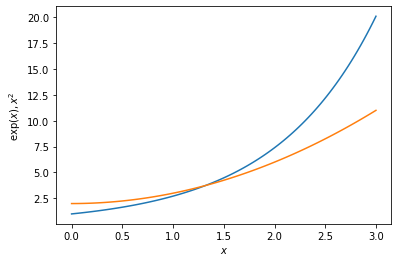

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# You can use modules local to the example being run, here
# we just use a trivial NumPy wrapper
N = 100

def main():
    x = np.linspace(0, 3, N)
    y0 = np.exp(x)
    y1 = 2 + x*x

    plt.figure()
    plt.plot(x, y0)
    plt.plot(x, y1)
    plt.xlabel('$x$')
    plt.ylabel('$\exp(x), x^2$')

    plt.show()

if __name__ == '__main__':
    main()

In [1]:
# fluentpy: coroutines
from inspect import getgeneratorstate

def simple_coroutine():
    print('-> coroutine started')
    x = yield # if coroutine just a receiver: it yields None
    print('-> coroutine received: ', x)
    yield None # remove this, just to continue test
    
def simple_coro2(a):
    print('-> Started: a =', a)
    b = yield a # coroutine suspends exactly at the yield keyword
    print('-> Received: b =', b)
    c = yield a + b
    print('-> Received: c =', c)
    
if __name__ == '__main__':
    my_coro = simple_coroutine()
    print(my_coro) # function called to get generator back
    next(my_coro) # generator has not started, cant send it data yet
    print(my_coro.send(42)) # evaluates the yield in the coroutine to 42
    # control flow stops at the end of the coroutine body -> StopIteration
    my_coro2 = simple_coro2(14)
    print(getgeneratorstate(my_coro2))
    print(next(my_coro2)) # advance coroutine to first yield (eval yield a, but not assigning to b yet)
    print(getgeneratorstate(my_coro2))
    print(my_coro2.send(28)) # sending 28 to the suspended coroutine, yield evaluates to 28 and binds to b, a+b yielded (42)
    print(my_coro2.send(99)) # c is assigned a + b
    print(getgeneratorstate(my_coro2))

<generator object simple_coroutine at 0x000001E766B4B6D0>
-> coroutine started
-> coroutine received:  42
None
GEN_CREATED
-> Started: a = 14
14
GEN_SUSPENDED
-> Received: b = 28
42
-> Received: c = 99


StopIteration: 

In [2]:
# FluentPy: coroutine running average

def averager():
    total = 0.0
    count = 0
    average = None
    while True: # coroutine accepts values and produces results as long as the caller sends them, terminates once caller sends .close() on it
        term = yield average # yield suspends the coroutine, produces result to caller and - later - to get a result from the caller, which resumes loop
        total += term
        count += 1
        average = total / count
        
if __name__ == '__main__':
    coro_avg = averager()
    print(next(coro_avg)) # priming the coroutine (cve: easily forgotten!)
    print(coro_avg.send(10))
    print(coro_avg.send(30))
    print(coro_avg.send(5))

None
10.0
20.0
15.0


In [3]:
# FluentPy: coroutine with primer for running average
from functools import wraps

def coroutine(func):
    '''decorator primes func by advancing to first yield'''
    @wraps(func)
    def primer(*args, **kwargs): # decorated generator is replaced by its primer function which, invoked, returns primed generator
        gen = func(*args, **kwargs) # call to decorated function to get generator object
        next(gen) # prime
        return gen # return generator
    return primer
    
@coroutine
def averager():
    '''same averager as before'''
    total = 0.0
    count = 0
    average = None
    while True: # coroutine accepts values and produces results as long as the caller sends them, terminates once caller sends .close() on it
        term = yield average # yield suspends the coroutine, produces result to caller and - later - to get a result from the caller, which resumes loop
        total += term
        count += 1
        average = total / count
        
if __name__ == '__main__':
    coro_avg = averager()
    #print(next(coro_avg)) # priming the coroutine (cve: easily forgotten!)
    print(coro_avg.send(10))
    print(coro_avg.send(30))
    print(coro_avg.send(5))

10.0
20.0
15.0


In [2]:
# triangles

def pyth(l0, x, y):
    return l0*l0 + x*x - y*y

if __name__ == '__main__':
    for xi in range(1,20,1):
        for yi in range(1,20,1):
            if pyth(8, xi, yi) == 0:
                print('x: ', xi, ' y: ', yi)

x:  6  y:  10
x:  15  y:  17


In [4]:
# fluentpy: yield from

def gen():
    for c in 'AB':
        yield c
    for i in range(1, 3):
        yield i
        
def geny():
    yield from 'AB'
    yield from range(1, 3)
    
if __name__ == '__main__':
    print(list(gen()))
    print(list(geny()))

['A', 'B', 1, 2]
['A', 'B', 1, 2]


In [5]:
# fluentpy: yield from: the subgenerator
from collections import namedtuple

Result = namedtuple('Result', 'count average') # namedtuple: (name of tuple, 'names of fields')

def averager():  # <1> same as before, now used as subgenerator
    total = 0.0
    count = 0
    average = None
    while True:
        term = yield  # <2> each value sent from main() will be bound to term
        if term is None:  # <3> crucial termination: without it, yield from blocks forever
            break
        total += term
        count += 1
        average = total/count
    return Result(count, average)  # <4> returned result will be the value of the yield from in grouper

# the delegating generator
def grouper(results, key): 
    while True:  # <6> each iteration creates a new instance of averager
        results[key] = yield from averager()  # <7> whenever grouper is sent a value its piped into the averager instance by yield from

# the client code, a.k.a. the caller
def main(data): 
    results = {}
    for key, values in data.items(): # items: list with all dictionary keys and values
        group = grouper(results, key)  # <9> grouper is a generator object; operates as coroutine
        next(group)  # <10> prime coroutine
        for value in values:
            group.send(value)  # <11> send each value into the grouper
        group.send(None)  # important! <12> causes averager to terminate and grouper to continue
    #print(results)  # uncomment to debug
    report(results)

# output report
def report(results):
    for key, result in sorted(results.items()):
        group, unit = key.split(';')
        print('{:2} {:5} averaging {:.2f}{}'.format(
              result.count, group, result.average, unit))

data = {
    'girls;kg':
        [40.9, 38.5, 44.3, 42.2, 45.2, 41.7, 44.5, 38.0, 40.6, 44.5],
    'girls;m':
        [1.6, 1.51, 1.4, 1.3, 1.41, 1.39, 1.33, 1.46, 1.45, 1.43],
    'boys;kg':
        [39.0, 40.8, 43.2, 40.8, 43.1, 38.6, 41.4, 40.6, 36.3],
    'boys;m':
        [1.38, 1.5, 1.32, 1.25, 1.37, 1.48, 1.25, 1.49, 1.46],
}

if __name__ == '__main__':
    main(data)

 9 boys  averaging 40.42kg
 9 boys  averaging 1.39m
10 girls averaging 42.04kg
10 girls averaging 1.43m


In [4]:
import collections

Person = collections.namedtuple('Person', 'name age gender')
print('Type of Person:', type(Person))
bob = Person(name='Bob', age=30, gender='male')
print('Representation:', bob)
jane = Person(name='Jane', age=29, gender='female')
print('Field by name:', jane.name)

print('Fields by index:')
for p in [ bob, jane ]:
    print('%s is a %d year old %s' % p) # print implicitly unpacks the tuple

Type of Person: <class 'type'>
Representation: Person(name='Bob', age=30, gender='male')
Field by name: Jane
Fields by index:
Bob is a 30 year old male
Jane is a 29 year old female


In [3]:
import random
import collections
import queue # implements multi-producer, multi-consumer queues
import argparse

from easydict import EasyDict as edict

DEFAULT_NUMBER_OF_TAXIS = 3
DEFAULT_END_TIME = 180
SEARCH_DURATION = 5
TRIP_DURATION = 20
DEPARTURE_INTERVAL = 5

Event = collections.namedtuple('Event', 'time proc action')


# BEGIN TAXI_PROCESS
def taxi_process(ident, trips, start_time=0):  # <1> called once per taxi
    """Yield to simulator issuing event at each state change"""
    time = yield Event(start_time, ident, 'leave garage')  # <2> first event is leave garage
    for i in range(trips):  # <3> block repeated once for each trip
        time = yield Event(time, ident, 'pick up passenger')  # <4> event signals passenger pickup
        time = yield Event(time, ident, 'drop off passenger')  # <5> same, dropoff

    yield Event(time, ident, 'going home')  # <6> for-loop ends after a given number of trips, final event yielded
    # end of taxi process # <7> coroutine falls off at the end: StopIteration
# END TAXI_PROCESS


# BEGIN TAXI_SIMULATOR
class Simulator:

    def __init__(self, procs_map):
        self.events = queue.PriorityQueue()
        self.procs = dict(procs_map)

    def run(self, end_time):  # <1> end_time only argument
        """Schedule and display events until time is up"""
        # schedule the first event for each cab
        for _, proc in sorted(self.procs.items()):  # <2> retrieve self.procs sorted, do not care about key so its _
            first_event = next(proc)  # <3> primes each coroutine to advance it to yield
            self.events.put(first_event)  # <4> add each event to the self.events.PriorityQueue

        # main loop of the simulation
        sim_time = 0  # <5> zero simulation clock
        while sim_time < end_time:  # <6> main simulation loop
            if self.events.empty():  # <7> exit if no events left
                print('*** end of events ***')
                break

            current_event = self.events.get()  # <8> get event with the smallest time in the event queue
            sim_time, proc_id, previous_action = current_event  # <9> unpack event data
            print('taxi:', proc_id, proc_id * '   ', current_event)  # <10> display event
            active_proc = self.procs[proc_id]  # <11> retrieve coroutine for active taxi
            next_time = sim_time + compute_duration(previous_action)  # <12> compute next activation time
            try:
                next_event = active_proc.send(next_time)  # <13> send time to taxi coroutine
            except StopIteration:
                del self.procs[proc_id]  # <14> StopIterationraised: delete coroutine from dict
            else:
                self.events.put(next_event)  # <15> put next event into queue
        else:  # <16> display number of events pending
            msg = '*** end of simulation time: {} events pending ***'
            print(msg.format(self.events.qsize()))
# END TAXI_SIMULATOR


def compute_duration(previous_action):
    """Compute action duration using exponential distribution"""
    if previous_action in ['leave garage', 'drop off passenger']:
        # new state is prowling
        interval = SEARCH_DURATION
    elif previous_action == 'pick up passenger':
        # new state is trip
        interval = TRIP_DURATION
    elif previous_action == 'going home':
        interval = 1
    else:
        raise ValueError('Unknown previous_action: %s' % previous_action)
    return int(random.expovariate(1/interval)) + 1


def main(end_time=DEFAULT_END_TIME, num_taxis=DEFAULT_NUMBER_OF_TAXIS,
         seed=None):
    """Initialize random generator, build procs and run simulation"""
    if seed is not None:
        random.seed(seed)  # get reproducible results

    taxis = {i: taxi_process(i, (i+1)*2, i*DEPARTURE_INTERVAL)
             for i in range(num_taxis)}
    sim = Simulator(taxis)
    sim.run(end_time)


if __name__ == '__main__':

    '''parser = argparse.ArgumentParser(
                        description='Taxi fleet simulator.')
    parser.add_argument('-e', '--end-time', type=int,
                        default=DEFAULT_END_TIME,
                        help='simulation end time; default = %s'
                        % DEFAULT_END_TIME)
    parser.add_argument('-t', '--taxis', type=int,
                        default=DEFAULT_NUMBER_OF_TAXIS,
                        help='number of taxis running; default = %s'
                        % DEFAULT_NUMBER_OF_TAXIS)
    parser.add_argument('-s', '--seed', type=int, default=None,
                        help='random generator seed (for testing)')

    args = parser.parse_args()'''

    args = edict({ # used to run it directly in notebook
        "end_time": 180,
        "taxis": 3,
        "seed": 10
    })
    main(args.end_time, args.taxis, args.seed)

taxi: 0  Event(time=0, proc=0, action='leave garage')
taxi: 0  Event(time=5, proc=0, action='pick up passenger')
taxi: 1     Event(time=5, proc=1, action='leave garage')
taxi: 1     Event(time=10, proc=1, action='pick up passenger')
taxi: 2        Event(time=10, proc=2, action='leave garage')
taxi: 1     Event(time=15, proc=1, action='drop off passenger')
taxi: 0  Event(time=17, proc=0, action='drop off passenger')
taxi: 2        Event(time=19, proc=2, action='pick up passenger')
taxi: 0  Event(time=23, proc=0, action='pick up passenger')
taxi: 2        Event(time=23, proc=2, action='drop off passenger')
taxi: 1     Event(time=24, proc=1, action='pick up passenger')
taxi: 2        Event(time=25, proc=2, action='pick up passenger')
taxi: 1     Event(time=30, proc=1, action='drop off passenger')
taxi: 0  Event(time=38, proc=0, action='drop off passenger')
taxi: 0  Event(time=39, proc=0, action='going home')
taxi: 1     Event(time=59, proc=1, action='pick up passenger')
taxi: 1     Event(

In [4]:
# key-value memories: first embedding tests
from gensim import corpora

def docstr2lst(text):
    '''text string with sentences separated by ., returns list of lists of sentences'''
    memraw = []
    for mem in text.split('.'):
        memraw.append(mem.split(' '))
    return memraw

def text2bow(memraw, memdict):
    '''raw text to bow (takes a list of lists of sentence words)'''
    membow = []
    for mem in memraw:
        memline = []
        for memw in mem:
            memline.append(memdict.token2id[memw])
        membow.append(memline)
    return membow

def windowlvlstr(text, lenW):
    '''return list of key=entire window, value=center word, string version'''
    if lenW % 2 == 0 or len(text) <= lenW:
        return ([],[])
    textl = text.split(' ')
    retkeys = []
    retvals = []
    lenW2 = int((lenW-1)/2)
    for ictr in range(lenW2, len(textl)-lenW2):
        thiskey = []
        retvals.append(textl[ictr])
        for ikey in range(ictr-lenW2, ictr+lenW2+1):
            thiskey.append(textl[ikey])
        retkeys.append(thiskey)
    return (retkeys, retvals)

def windowlvl(text, lenW):
    '''return list of key=entire window, value=center word, BOW version (text a list of ids)'''
    if lenW % 2 == 0 or len(text) <= lenW:
        return ([],[])
    retkeys = []
    retvals = []
    lenW2 = int((lenW-1)/2)
    for ictr in range(lenW2, len(text)-lenW2):
        thiskey = []
        retvals.append(text[ictr]) # center encoding: would need to add a different dict here
        for ikey in range(ictr-lenW2, ictr+lenW2+1):
            thiskey.append(text[ikey])
        retkeys.append(thiskey)
    return (retkeys, retvals)

# for window+center encoding: add a step for the center word:
# translate the center back to the original with dic 0, then with dic 1 to the center encoding
def windowclvl(text, lenW, memdict, cdict):
    '''return list of key=entire window, value=center word, BOW version with center'''
    if lenW % 2 == 0 or len(text) <= lenW:
        return ([],[])
    retkeys = []
    retvals = []
    lenW2 = int((lenW-1)/2)
    for ictr in range(lenW2, len(text)-lenW2):
        thiskey = []
        retvals.append(cdict.token2id[memdict[text[ictr]]]) # center encoding: different dict for ctr word
        for ikey in range(ictr-lenW2, ictr+lenW2+1):
            thiskey.append(text[ikey])
        retkeys.append(thiskey)
    return (retkeys, retvals)

if __name__=="__main__":
    text = 'this is a test with a lot of ambiguity. docs are split by periods.'
    memraw = docstr2lst(text)
    print(memraw)
    memdict = corpora.Dictionary(memraw)
    print(memdict.token2id)
    #print(memdict[1])
    print(windowlvlstr(text, 3))
    #print(windowlvlstr(text, 5))
    # text to bow
    membow = text2bow(memraw, memdict)
    print(membow)
    print(windowlvl(membow[0], 3))
    print(windowclvl(membow[0], 3, memdict, memdict)) # test with the same for now

[['this', 'is', 'a', 'test', 'with', 'a', 'lot', 'of', 'ambiguity'], ['', 'docs', 'are', 'split', 'by', 'periods'], ['']]
{'a': 0, 'ambiguity': 1, 'is': 2, 'lot': 3, 'of': 4, 'test': 5, 'this': 6, 'with': 7, '': 8, 'are': 9, 'by': 10, 'docs': 11, 'periods': 12, 'split': 13}
([['this', 'is', 'a'], ['is', 'a', 'test'], ['a', 'test', 'with'], ['test', 'with', 'a'], ['with', 'a', 'lot'], ['a', 'lot', 'of'], ['lot', 'of', 'ambiguity.'], ['of', 'ambiguity.', 'docs'], ['ambiguity.', 'docs', 'are'], ['docs', 'are', 'split'], ['are', 'split', 'by'], ['split', 'by', 'periods.']], ['is', 'a', 'test', 'with', 'a', 'lot', 'of', 'ambiguity.', 'docs', 'are', 'split', 'by'])
[[6, 2, 0, 5, 7, 0, 3, 4, 1], [8, 11, 9, 13, 10, 12], [8]]
([[6, 2, 0], [2, 0, 5], [0, 5, 7], [5, 7, 0], [7, 0, 3], [0, 3, 4], [3, 4, 1]], [2, 0, 5, 7, 0, 3, 4])
([[6, 2, 0], [2, 0, 5], [0, 5, 7], [5, 7, 0], [7, 0, 3], [0, 3, 4], [3, 4, 1]], [2, 0, 5, 7, 0, 3, 4])


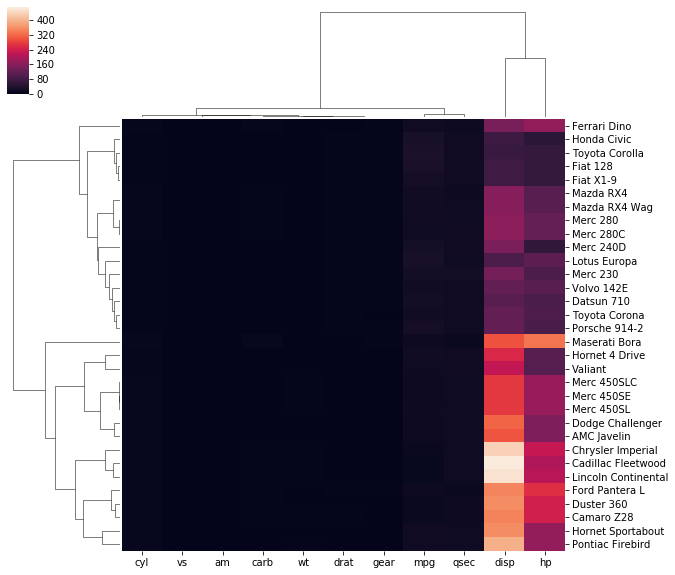

In [2]:
# https://python-graph-gallery.com/404-dendrogram-with-heat-map/
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
 
# Data set
url = 'https://python-graph-gallery.com/wp-content/uploads/mtcars.csv'
df = pd.read_csv(url)
df = df.set_index('model')
del df.index.name
df
 
# Default plot
sns.clustermap(df)


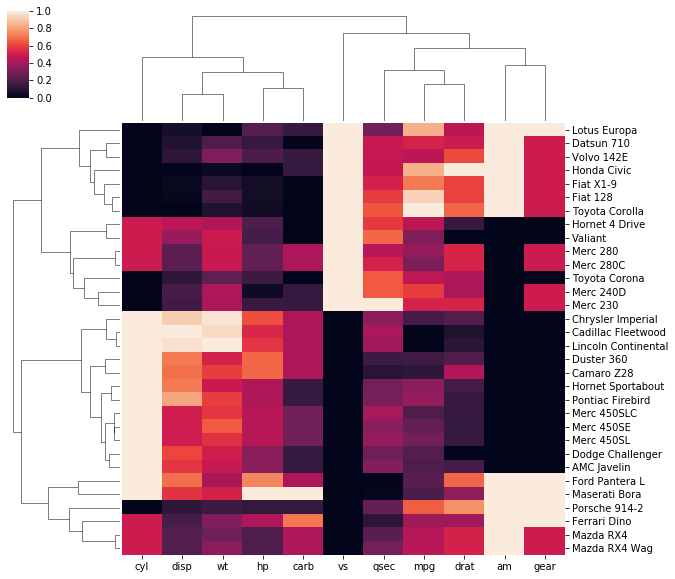

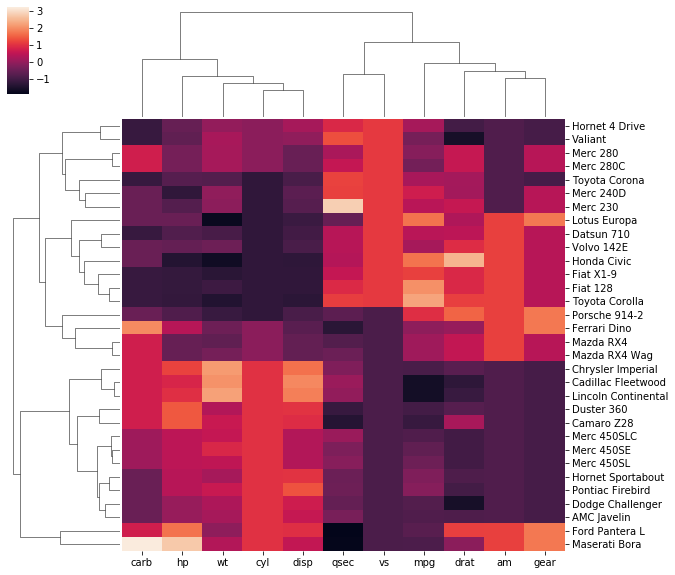

In [3]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
 
# Data set
url = 'https://python-graph-gallery.com/wp-content/uploads/mtcars.csv'
df = pd.read_csv(url)
df = df.set_index('model')
del df.index.name
df
 
# Standardize or Normalize every column in the figure
# Standardize:
sns.clustermap(df, standard_scale=1)
# Normalize
sns.clustermap(df, z_score=1)


In [8]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
 
# Import the mtcars dataset from the web + keep only numeric variables
url = 'https://python-graph-gallery.com/wp-content/uploads/mtcars.csv'
df = pd.read_csv(url)
df = df.set_index('model')
del df.index.name
df


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [75.0, 75.0, 92.5, 92.5],
  [65.0, 65.0, 83.75, 83.75],
  [55.0, 55.0, 74.375, 74.375],
  [45.0, 45.0, 64.6875, 64.6875],
  [125.0, 125.0, 135.0, 135.0],
  [145.0, 145.0, 155.0, 155.0],
  [130.0, 130.0, 150.0, 150.0],
  [115.0, 115.0, 140.0, 140.0],
  [54.84375, 54.84375, 127.5, 127.5],
  [13.75, 13.75, 91.171875, 91.171875],
  [165.0, 165.0, 175.0, 175.0],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [215.0, 215.0, 225.0, 225.0],
  [192.5, 192.5, 220.0, 220.0],
  [170.0, 170.0, 206.25, 206.25],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [235.0, 235.0, 252.5, 252.5],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [305.0, 305.0, 315.0, 315.0],
  [282.5, 282.5, 310.0, 310.0],
  [243.75, 243.75, 296.25, 296.25],
  [188.125, 188.125, 270.0, 270.0],
  [52.4609375, 52.4609375, 2

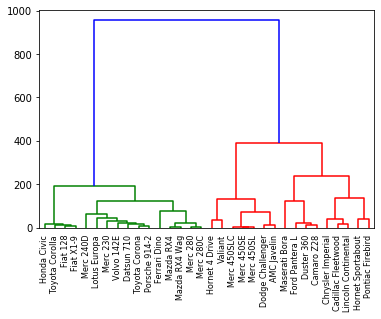

In [7]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster import hierarchy
import numpy as np
 
# Data set
url = 'https://python-graph-gallery.com/wp-content/uploads/mtcars.csv'
df = pd.read_csv(url)
df = df.set_index('model')
del df.index.name
df
 
# Calculate the distance between each sample
Z = hierarchy.linkage(df, 'ward') # Perform hierarchical/agglomerative clustering: method=’ward’: Ward var min algo 
 
# Plot with Custom leaves
hierarchy.dendrogram(Z, leaf_rotation=90, leaf_font_size=8, labels=df.index)

[[2], [8], [0], [4], [1], [9], [9], [0]]
[[ 5.          6.          0.          2.        ]
 [ 2.          7.          0.          2.        ]
 [ 0.          4.          1.          2.        ]
 [ 1.          8.          1.15470054  3.        ]
 [ 9.         10.          2.12132034  4.        ]
 [ 3.         12.          4.11096096  5.        ]
 [11.         13.         14.07183949  8.        ]]


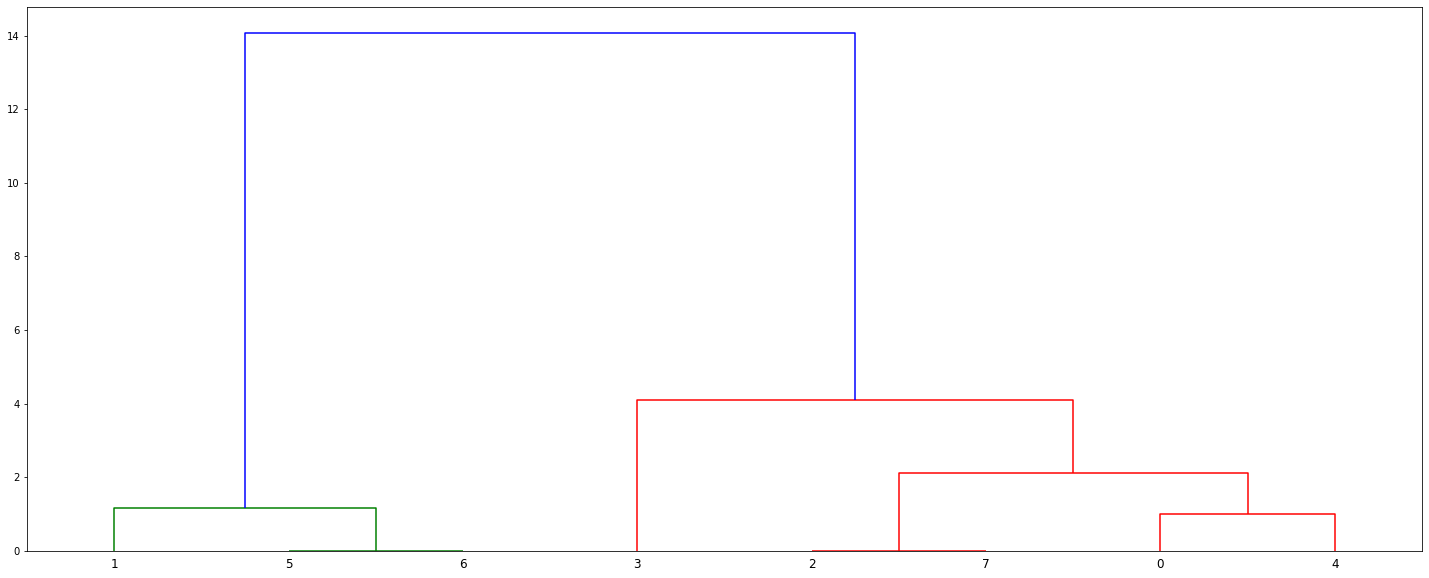

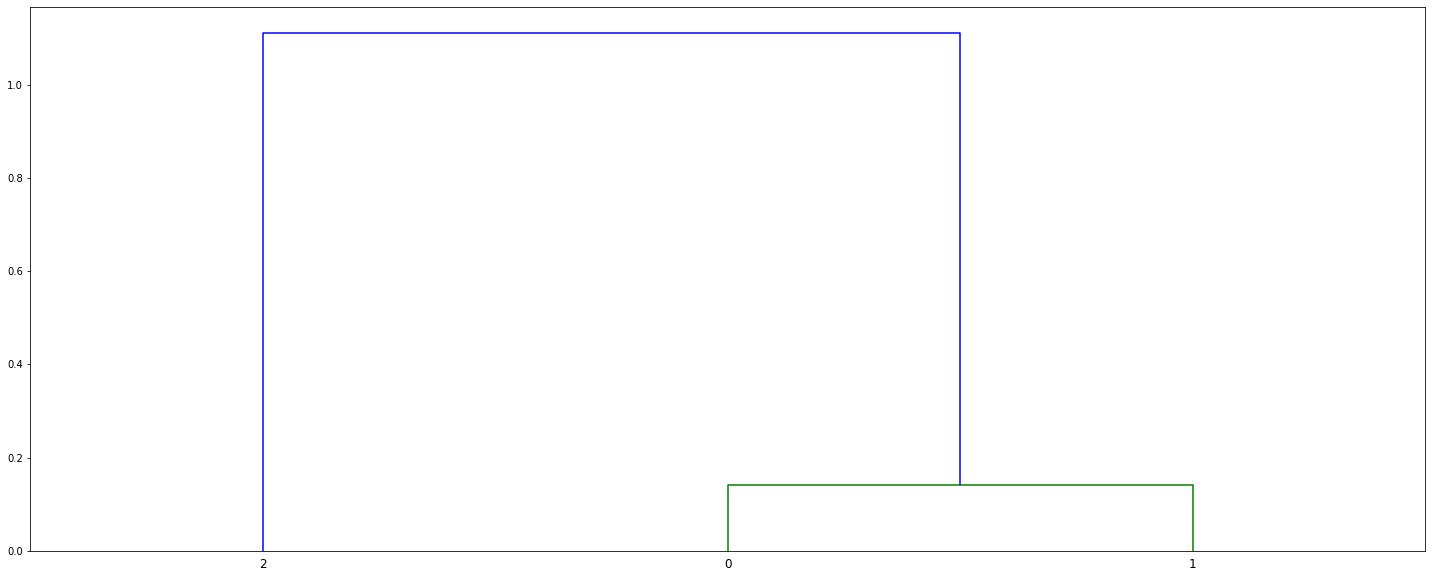

In [15]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster import hierarchy
import numpy as np
 
X = [[i] for i in [2, 8, 0, 4, 1, 9, 9, 0]] # observations 5 & 6 and 2 & 7 are closest (dist=0), then 0 & 4 and so on
print(X)
Z = linkage(X, 'ward')
print(Z)
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
#Z = linkage(X, 'single')
#fig = plt.figure(figsize=(25, 10))
#dn = dendrogram(Z)
XX = [[.1, .6, .1], [0., .5, .1], [.8, .1, .5]] # 0 and 1 quite similar, 2 different
ZZ = linkage(XX, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(ZZ)
plt.show()

In [2]:
# fluentpy: download classic
from urllib.request import urlopen
import warnings
import os
import json

URL = 'http://www.oreilly.com/pub/sc/osconfeed'
JSON = 'data/osconfeed.json'

def load():
    if not os.path.exists(JSON):
        msg = 'downloading {} to {}'.format(URL, JSON)
        warnings.warn(msg)  # <1> warn in case of new download
        with urlopen(URL) as remote, open(JSON, 'wb') as local:  # <2> using two context managers (read & save)
            local.write(remote.read())

    with open(JSON) as fp:
        return json.load(fp)  # <3> parses JSON and returns Python objects
    
if __name__=="__main__":
    feed = load()
    print(sorted(feed['Schedule'].keys()))

['conferences', 'events', 'speakers', 'venues']


In [3]:
# fluentpy: dynamic attributes
from collections import abc # abc=abstract base class
import keyword
import os
import json

URL = 'http://www.oreilly.com/pub/sc/osconfeed'
JSON = 'data/osconfeed.json'

def load():
    if not os.path.exists(JSON):
        msg = 'downloading {} to {}'.format(URL, JSON)
        warnings.warn(msg)  # <1> warn in case of new download
        with urlopen(URL) as remote, open(JSON, 'wb') as local:  # <2> using two context managers (read & save)
            local.write(remote.read())

    with open(JSON) as fp:
        return json.load(fp)  # <3> parses JSON and returns Python objects
    
class FrozenJSON:
    """A read-only façade for navigating a JSON-like object
       using attribute notation
    """
    def __init__(self, mapping):
        #self.__data = dict(mapping)  # <1> build dict from the mapping argument - commented out: demo invalid attribute
        self.__data = {}
        for key, value in mapping.items():
            if keyword.iskeyword(key): # check if key is not a reserved keyword
                key += '_' # change a bit to avoid conflict
            self.__data[key] = value

    def __getattr__(self, name):  # <2> called only when there is no attribute with that name
        if hasattr(self.__data, name):
            return getattr(self.__data, name)  # <3> if name matches an attribute of the instance __data, return it
        else:
            return FrozenJSON.build(self.__data[name])  # <4> otherwise fetch the item with the key name and call build

    @classmethod
    def build(cls, obj):  # <5> alternate constructor
        if isinstance(obj, abc.Mapping):  # <6> if object is a mapping work with that
            return cls(obj)
        elif isinstance(obj, abc.MutableSequence):  # <7> if it is a mutable sequence it must be a list
            return [cls.build(item) for item in obj]
        else:  # <8> not a dict or list: return as is
            return obj
        
if __name__=="__main__":
    raw_feed = load()
    feed = FrozenJSON(raw_feed)
    print(len(feed.Schedule.speakers)) # traversing nested dicts via attribute notation
    print(sorted(feed.Schedule.keys()))
    for key, value in sorted(feed.Schedule.items()):
        print('{:3} {}'.format(len(value), key))

1
['conferences', 'events', 'speakers', 'venues']
  1 conferences
  1 events
  1 speakers
  1 venues


In [14]:
# toh
def ndisc(n, p0, p1): # (n-1, p0, pt) (1, p0, p1) (n-1, pt, p1)
    if n == 1:
        return (p0, p1)
    pegs = [0, 1, 2]
    pegs.remove(p0)
    pegs.remove(p1)
    return (ndisc(n-1, p0, pegs[0]), ndisc(1, p0, p1), ndisc(n-1, pegs[0], p1))

if __name__=="__main__":
    print(ndisc(1, 0, 2))
    print(ndisc(2, 0, 2))
    print(ndisc(3, 0, 2))
    print(ndisc(4, 0, 2))

(0, 2)
((0, 1), (0, 2), (1, 2))
(((0, 2), (0, 1), (2, 1)), (0, 2), ((1, 0), (1, 2), (0, 2)))
((((0, 1), (0, 2), (1, 2)), (0, 1), ((2, 0), (2, 1), (0, 1))), (0, 2), (((1, 2), (1, 0), (2, 0)), (1, 2), ((0, 1), (0, 2), (1, 2))))
